<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/iris_split_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 가져오기(sklearn -> iris)

In [1]:
from sklearn import datasets

iris 데이터가 cm로 동일하기 때문에 스케일링 할 필요 없다


iris.feaure_names  (각 컬럼 네임)
```
['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']
```

iris.data와 target을 쓸거다

In [2]:
iris = datasets.load_iris()

In [3]:
import pandas as pd

In [4]:
df_iris = pd.DataFrame(iris.data)

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


##  DB에 넣기

In [6]:
import sqlite3

In [7]:
connect = sqlite3.connect('./db.sqlite3')

In [8]:
df_iris.to_sql('iris_resource', connect, if_exists='append' , index=False)

In [9]:
df_load = pd.read_sql_query('select * from iris_resource', connect)

df_load.head(4)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [10]:
x_data = df_load.to_numpy()

In [11]:
x_data.shape

(150, 4)

In [12]:
y_data = iris.target

In [13]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

####`>>>`split 후

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_val, y_train , y_val= train_test_split(x_data, y_data)

In [16]:
import numpy as np
np.unique(y_data)

array([0, 1, 2])

(스플릿 단계 생략)

## 교육단계 

데이터 통째로 딥러닝에 넣기

### 모델만들기

In [17]:
import tensorflow as tf

In [18]:
model = tf.keras.Sequential()

In [19]:
model.add(tf.keras.Input(shape =(4,)))

In [20]:
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(24, activation='relu'))

In [21]:
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 75        
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


### 학습시키기

validation_split 쏠림 현상이 있을 수 있으니 다른데이터랑 비교하는 것 

#### `>>>`split 후

In [24]:
# model.fit(x_data, y_data, epochs=50, validation_split=0.3)
model.fit(x_train, y_train, epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 1s 53ms/step - loss: 1.0248 - acc: 0.6429 - val_loss: 0.9743 - val_acc: 0.6316
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9506 - acc: 0.7411 - val_loss: 0.9177 - val_acc: 0.7368
Epoch 3/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9042 - acc: 0.7768 - val_loss: 0.8805 - val_acc: 0.7895
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8683 - acc: 0.7946 - val_loss: 0.8518 - val_acc: 0.8158
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8373 - acc: 0.8393 - val_loss: 0.8276 - val_acc: 0.6842
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8091 - acc: 0.8393 - val_loss: 0.8012 - val_acc: 0.7632
Epoch 7/50
4/4 [==============================] - 0s 7ms/step - loss: 0.7777 - acc: 0.8482 - val_loss: 0.7726 - val_acc: 0.9474
Epoch 8/50
4/4 [==============================] - 0s 8ms/step - loss: 0.7515 - acc: 0.8036 - val_loss: 

### 검증

#### `>>>` split 후

In [25]:
# model.evaluate(x_data, y_data) # loss: 0.5512 - acc: 0.6667

model.evaluate(x_train, y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.2128 - acc: 0.9821


[0.21283142268657684, 0.9821428656578064]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
y_pred = model.predict(x_data)
y_pred.shape , y_pred[4]

((150, 3), array([9.7731894e-01, 2.2284666e-02, 3.9633390e-04], dtype=float32))

In [28]:
import numpy as np
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
y_data.shape, y_data[4]

((150,), 0)

 split 전
 
 0 분류는 1.00 으로 100% 잘 맞앗는데 

 1 분류는 좀 다르네? 내용 열어서 데이터마이닝 하는 작업해줘야하는구나 

 ```
  0       1.00      1.00      1.00        50
  1       0.50      1.00      0.67        50
 ```

#### `>>>` split 후

In [30]:
print(classification_report(y_data, y_pred_argmax))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



split 전 

2의 값이 없는것 확인 됨
```
           2       0.00      0.00      0.00        50
```

데이터가 셔플이 안됬구나 알 수 있음`->` 이때는 케이폴드 사용해서 섞어줘야 한다는 것을 알게 됨

#### `>>>` split 후

In [31]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
confusion_matrix(y_data, y_pred_argmax)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  0, 50]])

In [33]:
import seaborn as sns

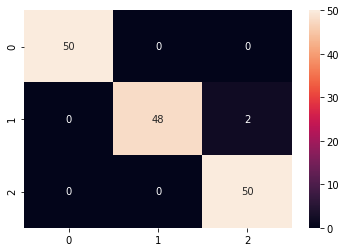

In [34]:
sns.heatmap(confusion_matrix(y_data, y_pred_argmax), annot=True)

## 서비스 단계

In [35]:
x_data[25] , y_data[25]

(array([5. , 3. , 1.6, 0.2]), 0)

In [36]:
pred = model.predict([[5. , 3. , 1.6, 0.2]])
pred

array([[0.9301559 , 0.06846534, 0.00137883]], dtype=float32)

In [37]:
import numpy as np
np.argmax(pred)

0

In [38]:
from sklearn.metrics import roc_curve, auc
y_pred= model.predict(x_data)
y_pred.shape

(150, 3)

## Backpropergation
